In [111]:
import pandas as pd
import numpy as np

In [112]:
data=pd.read_excel("customers.xlsx")
data

,CustomerID,CustomerName,Email,Gender,Age,GeographyID
0,1,Emma Anderson,emma.anderson@example.com,Male,50,2
1,2,Sarah Brown,sarah.brown@example.com,Female,37,4
2,3,Robert Hernandez,robert.hernandez@example.com,Female,26,6
3,4,David Garcia,david.garcia@example.com,Male,25,8
4,5,Emma Miller,emma.miller@example.com,Female,41,4
...,...,...,...,...,...,...
95,96,Emily Gonzalez,emily.gonzalez@example.com,Female,38,10
96,97,Emily Rodriguez,emily.rodriguez@example.com,Female,51,3
97,98,Chris Lopez,chris.lopez@example.com,Female,55,10
98,99,Laura Hernandez,laura.hernandez@example.com,Male,41,5


In [113]:
data.head()

,CustomerID,CustomerName,Email,Gender,Age,GeographyID
0,1,Emma Anderson,emma.anderson@example.com,Male,50,2
1,2,Sarah Brown,sarah.brown@example.com,Female,37,4
2,3,Robert Hernandez,robert.hernandez@example.com,Female,26,6
3,4,David Garcia,david.garcia@example.com,Male,25,8
4,5,Emma Miller,emma.miller@example.com,Female,41,4


# Add spaces to column names

In [221]:
data.rename(columns={
    'CustomerID': 'Customer ID',
    'CustomerName': 'Customer Name',
    'GeographyID': 'Geography ID'
}, inplace=True)


In [223]:
data

,Customer ID,Customer Name,Email,Gender,Age,Geography ID,Age Group,First Name,Mismatched,AgeGroup,FirstName,LastName,EmailDomain
0,1,Emma Anderson,emma.anderson@example.com,Male,50,2,40-50,Emma,True,46-55,Emma,Anderson,example.com
1,2,Sarah Brown,sarah.brown@example.com,Female,37,4,30-40,Sarah,False,36-45,Sarah,Brown,example.com
2,3,Robert Hernandez,robert.hernandez@example.com,Female,26,6,18-30,Robert,True,26-35,Robert,Hernandez,example.com
3,4,David Garcia,david.garcia@example.com,Male,25,8,18-30,David,False,19-25,David,Garcia,example.com
4,5,Emma Miller,emma.miller@example.com,Female,41,4,40-50,Emma,False,36-45,Emma,Miller,example.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Emily Gonzalez,emily.gonzalez@example.com,Female,38,10,30-40,Emily,False,36-45,Emily,Gonzalez,example.com
96,97,Emily Rodriguez,emily.rodriguez@example.com,Female,51,3,50-60,Emily,False,46-55,Emily,Rodriguez,example.com
97,98,Chris Lopez,chris.lopez@example.com,Female,55,10,50-60,Chris,False,46-55,Chris,Lopez,example.com
98,99,Laura Hernandez,laura.hernandez@example.com,Male,41,5,40-50,Laura,False,36-45,Laura,Hernandez,example.com


 ## Gender Distribution of Customers

In [115]:
data['Gender'].value_counts()

Gender
Female    54
Male      46
Name: count, dtype: int64

## Average, Minimum, and Maximum Age of Customers

In [117]:
data['Age'].agg(['mean','max','min'])

mean    41.99
max     69.00
min     18.00
Name: Age, dtype: float64

## Customers Distribution Across Age Groups


In [119]:
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['<18', '18-30', '30-40', '40-50', '50-60', '60+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels)
data['Age Group'].value_counts()


Age Group
30-40    24
18-30    22
40-50    22
50-60    16
60+      14
<18       2
Name: count, dtype: int64

## Customers per GeographyID

In [121]:
data['GeographyID'].value_counts()

GeographyID
4     18
5     12
2     11
10    10
1     10
6      9
7      9
8      8
9      8
3      5
Name: count, dtype: int64

## GeographyID with the Most Customers

In [123]:
data['GeographyID'].value_counts().idxmax()

4

## Most Common First Name

In [125]:
data['CustomerName'].str.split().str[0].value_counts().idxmax()

'Emma'

## Most Common Last Name

In [127]:
data['CustomerName'].str.split().str[-1].value_counts().idxmax()

'Hernandez'

## Most Common Email Domain

In [129]:
data['Email'].str.split('@').str[0].value_counts().idxmax()

'emma.anderson'

## Correlation Between Gender and Average Age

In [131]:
data.groupby('Gender')['Age'].mean()

Gender
Female    42.981481
Male      40.826087
Name: Age, dtype: float64

## Are CustomerIDs Unique and Sorted?

In [133]:
data['CustomerID'].is_unique , data['CustomerID'].is_monotonic_increasing

(True, True)

## Are There Any Outliers in Customer Ages

<Axes: ylabel='Age'>

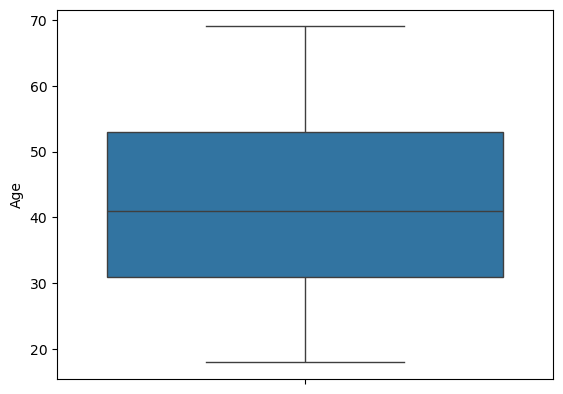

In [135]:
import seaborn as sns
sns.boxplot(data['Age'])

## Mismatches Between Gender and Traditional Names

In [137]:
common_male_names = ["David", "Robert", "John"]
common_female_names = ["Sarah", "Emma", "Jessica"]

data['First Name'] = data['CustomerName'].str.split().str[0]
data['Mismatched'] = ((data['Gender'] == 'Male') & (data['First Name'].isin(common_female_names))) | \
                   ((data['Gender'] == 'Female') & (data['First Name'].isin(common_male_names)))

data[data['Mismatched']]


,CustomerID,CustomerName,Email,Gender,Age,GeographyID,Age Group,First Name,Mismatched
0,1,Emma Anderson,emma.anderson@example.com,Male,50,2,40-50,Emma,True
2,3,Robert Hernandez,robert.hernandez@example.com,Female,26,6,18-30,Robert,True
10,11,Emma Garcia,emma.garcia@example.com,Male,54,10,50-60,Emma,True
14,15,Emma Martinez,emma.martinez@example.com,Male,32,9,30-40,Emma,True
17,18,Robert Lopez,robert.lopez@example.com,Female,38,5,30-40,Robert,True
34,35,Robert Rodriguez,robert.rodriguez@example.com,Female,46,2,40-50,Robert,True
41,42,John Gonzalez,john.gonzalez@example.com,Female,69,1,60+,John,True
51,52,Robert Williams,robert.williams@example.com,Female,41,9,40-50,Robert,True
67,68,David Gonzalez,david.gonzalez@example.com,Female,57,6,50-60,David,True
68,69,Emma Gonzalez,emma.gonzalez@example.com,Male,26,4,18-30,Emma,True


## Age Group with the Highest Number of Customers

In [139]:
data['Age Group'].value_counts().idxmax()

'30-40'

## Dominant Gender in Each Geography

<Axes: xlabel='GeographyID'>

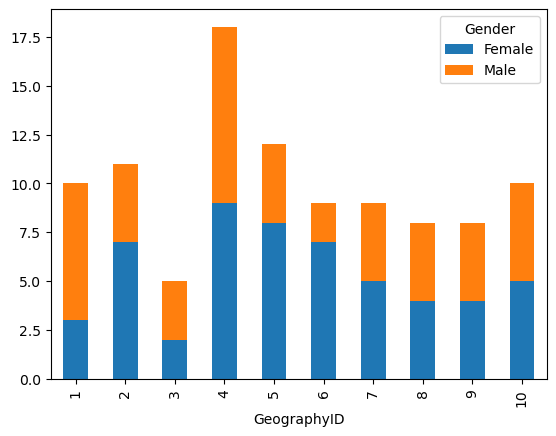

In [141]:
data.groupby(['GeographyID', 'Gender']).size().unstack().plot(kind='bar', stacked=True)


In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
sns.set(style="whitegrid")


# 1. Gender Distribution (Pie Chart)

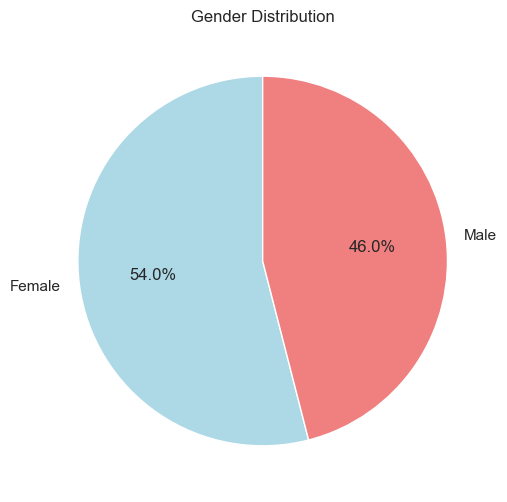

In [174]:
gender_distribution = data['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()

# 2. Age Distribution (Histogram)

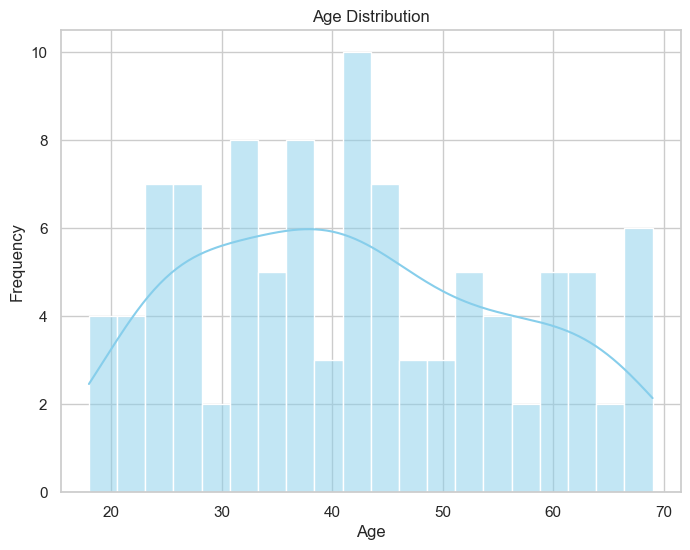

In [177]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 3. Age Groups Distribution (Bar Plot)

C:\Users\kk\AppData\Local\Temp\ipykernel_13804\4097950023.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values, palette='viridis')


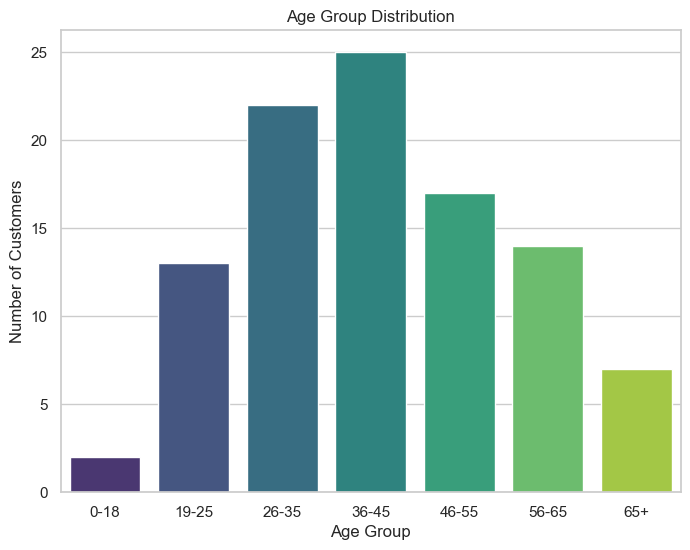

In [184]:
# Define age groups
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)
age_group_distribution = data['AgeGroup'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values, palette='viridis')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()


# 4. Customers per GeographyID (Bar Plot)

C:\Users\kk\AppData\Local\Temp\ipykernel_13804\403274753.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customers_per_geography.index, y=customers_per_geography.values, palette='magma')


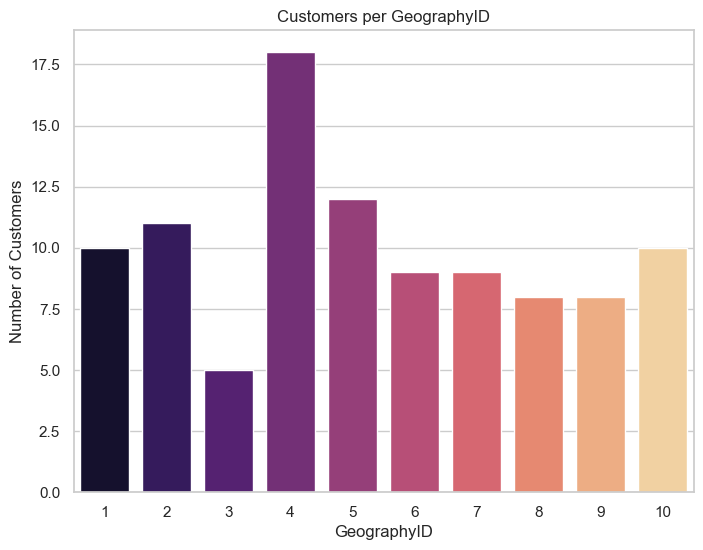

In [187]:
customers_per_geography = data['GeographyID'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=customers_per_geography.index, y=customers_per_geography.values, palette='magma')
plt.title('Customers per GeographyID')
plt.xlabel('GeographyID')
plt.ylabel('Number of Customers')
plt.show()

# 5. Most Common First Names (Bar Plot)

C:\Users\kk\AppData\Local\Temp\ipykernel_13804\2093509448.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_first_names.values, y=top_first_names.index, palette='coolwarm')


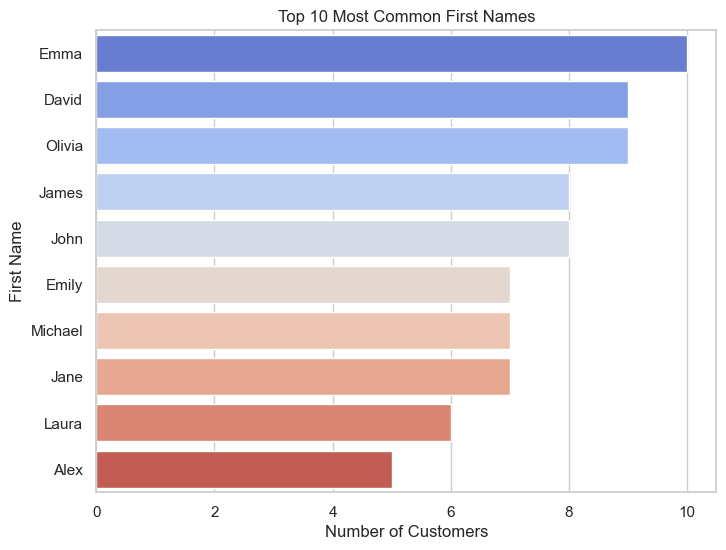

In [190]:
data['FirstName'] = data['CustomerName'].apply(lambda x: x.split()[0])
top_first_names = data['FirstName'].value_counts().head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x=top_first_names.values, y=top_first_names.index, palette='coolwarm')
plt.title('Top 10 Most Common First Names')
plt.xlabel('Number of Customers')
plt.ylabel('First Name')
plt.show()

# 6. Most Common Last Names (Bar Plot)

C:\Users\kk\AppData\Local\Temp\ipykernel_13804\2937242950.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_last_names.values, y=top_last_names.index, palette='plasma')


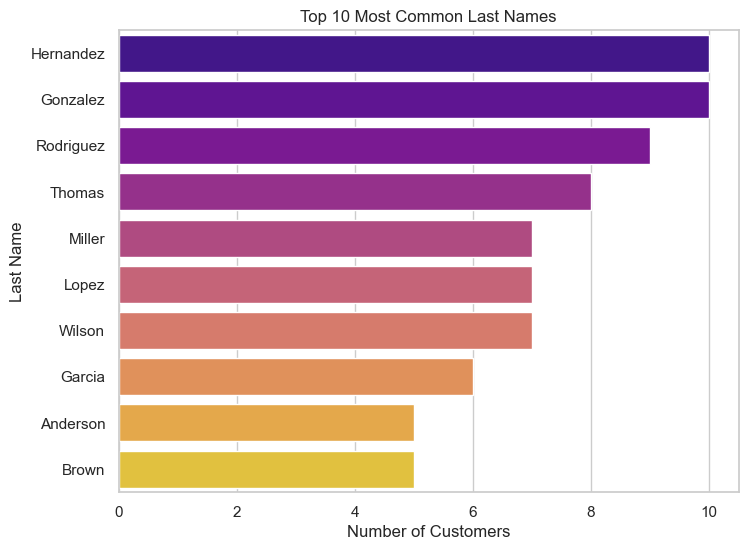

In [195]:
data['LastName'] = data['CustomerName'].apply(lambda x: x.split()[-1])
top_last_names = data['LastName'].value_counts().head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x=top_last_names.values, y=top_last_names.index, palette='plasma')
plt.title('Top 10 Most Common Last Names')
plt.xlabel('Number of Customers')
plt.ylabel('Last Name')
plt.show()

# 7. Email Domain Distribution (Pie Chart)

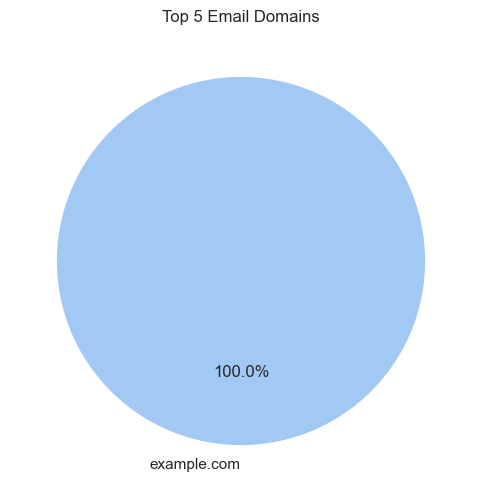

In [198]:
data['EmailDomain'] = data['Email'].apply(lambda x: x.split('@')[1])
email_domain_distribution = data['EmailDomain'].value_counts().head(5)  # Top 5 domains
plt.figure(figsize=(6, 6))
plt.pie(email_domain_distribution, labels=email_domain_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Top 5 Email Domains')
plt.show()


# 8. Gender Distribution per GeographyID (Stacked Bar Plot)

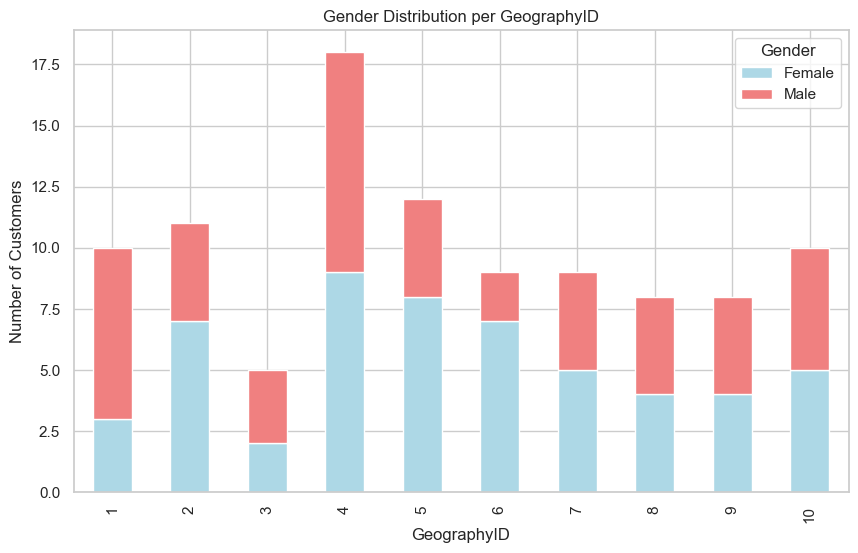

In [201]:
gender_geography = data.groupby(['GeographyID', 'Gender']).size().unstack()
gender_geography.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'lightcoral'])
plt.title('Gender Distribution per GeographyID')
plt.xlabel('GeographyID')
plt.ylabel('Number of Customers')
plt.show()

# 9. Correlation Between Age and GeographyID (Box Plot)

C:\Users\kk\AppData\Local\Temp\ipykernel_13804\3692711619.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GeographyID', y='Age', data=data, palette='Set3')


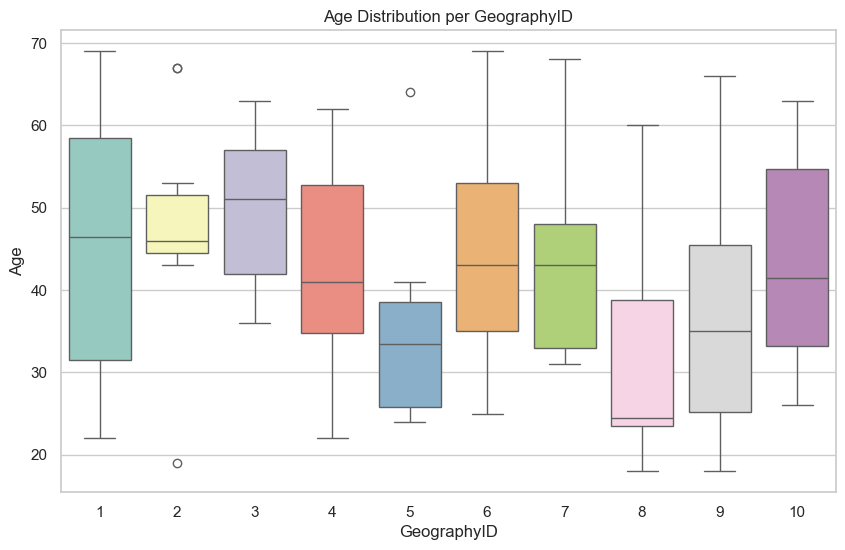

In [204]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GeographyID', y='Age', data=data, palette='Set3')
plt.title('Age Distribution per GeographyID')
plt.xlabel('GeographyID')
plt.ylabel('Age')
plt.show()


# 10. Dominant Gender in Each GeographyID (Pie Chart per GeographyID)

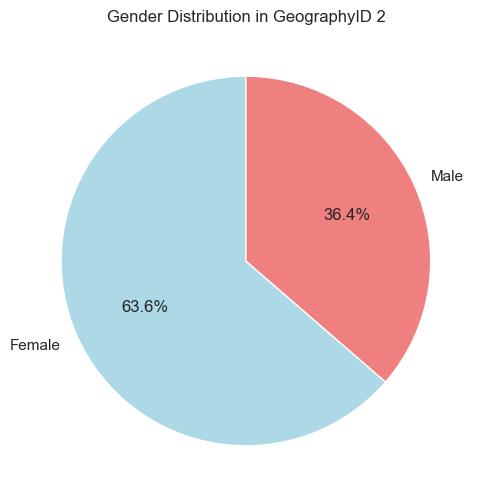

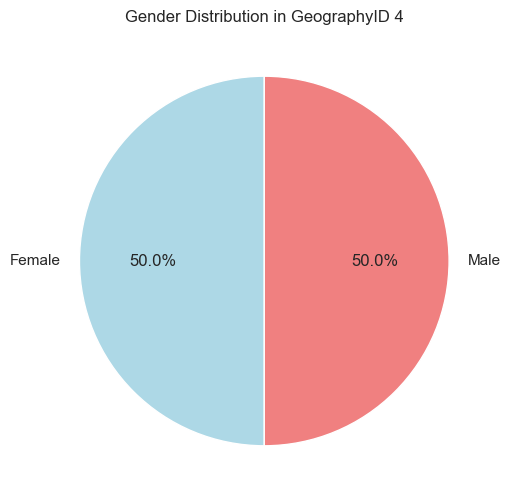

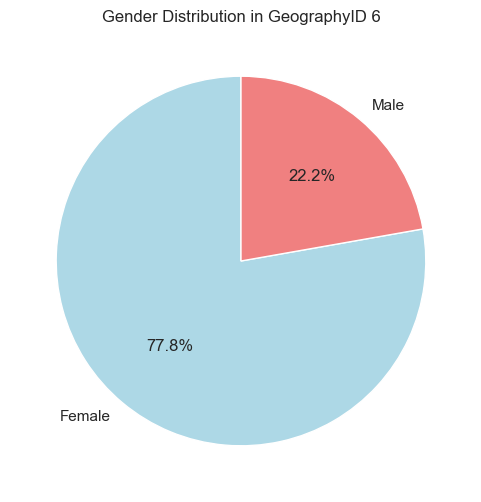

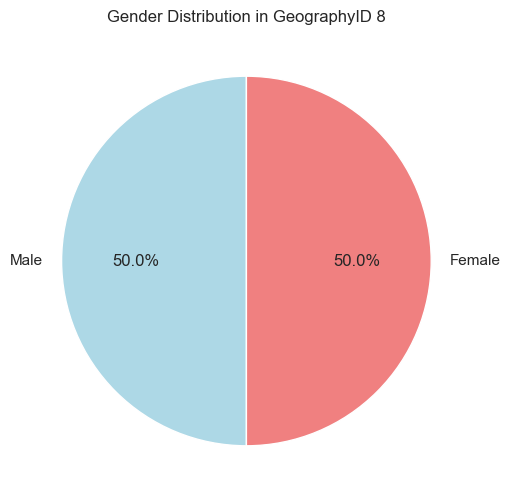

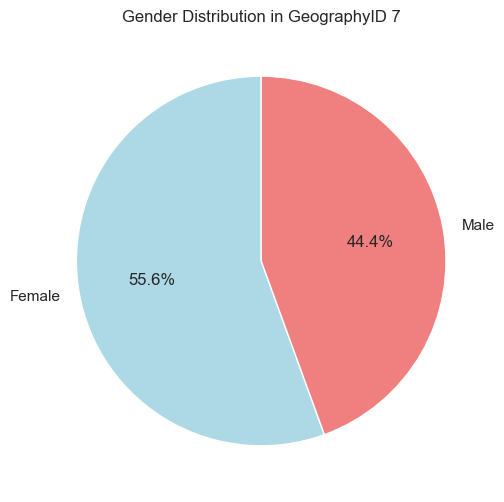

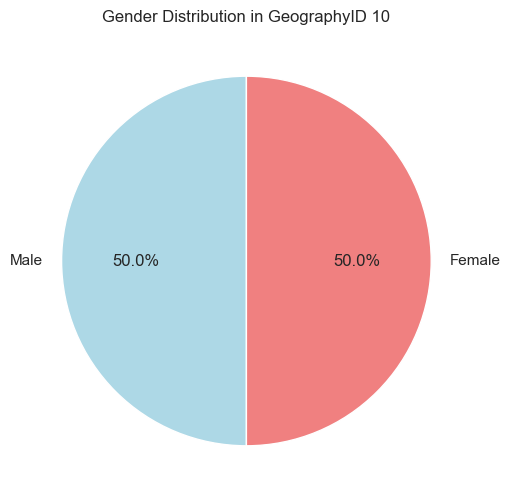

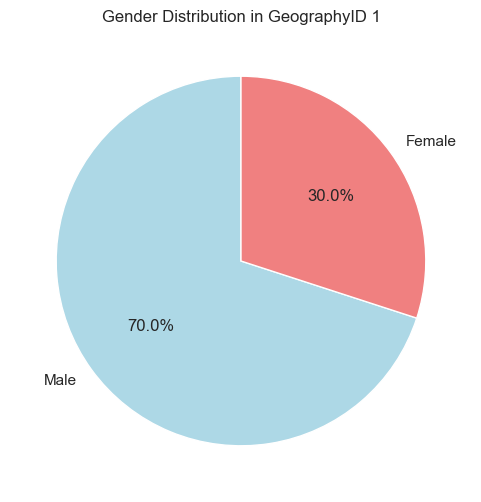

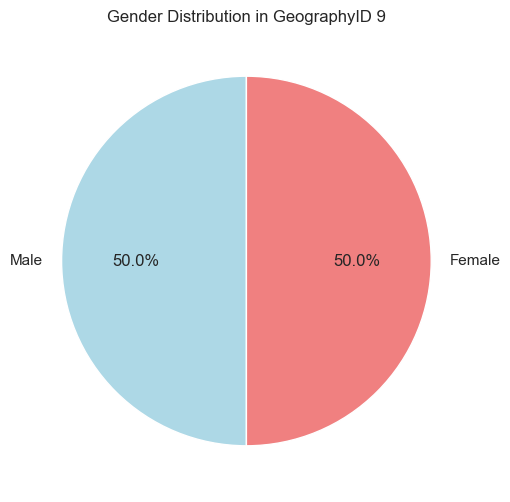

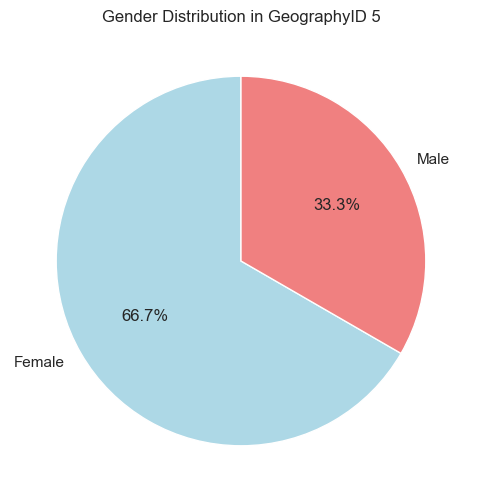

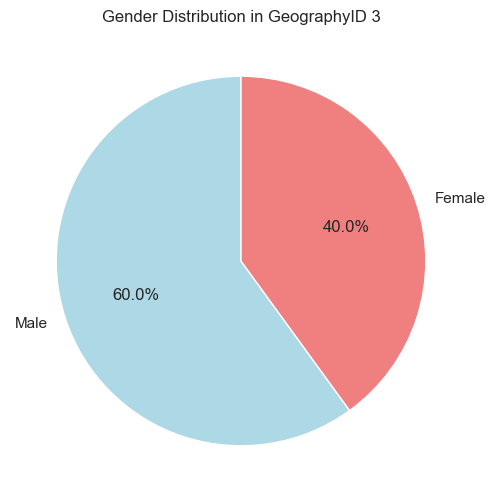

In [207]:
dominant_gender_per_geography = data.groupby(['GeographyID', 'Gender']).size().unstack().idxmax(axis=1)
for geography_id in data['GeographyID'].unique():
    gender_distribution = data[data['GeographyID'] == geography_id]['Gender'].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
    plt.title(f'Gender Distribution in GeographyID {geography_id}')
    plt.show()

In [210]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


# Save the updated dataset to a new Excel file

In [213]:
data.to_excel('updated_customers.xlsx', index=False)
print("Updated dataset saved to 'updated_customers.xlsx'.")

Updated dataset saved to 'updated_customers.xlsx'.
